In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv', index_col='id')
df_test = pd.read_csv('test.csv', index_col='id')

In [3]:
df_train.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Dealing with NaN values in the train set

1) NaN values in the title column

In [4]:
for col in df_train.columns:
    print(col, ':')
    print(df_train[col].isna().value_counts())

title :
False    20242
True       558
Name: title, dtype: int64
author :
False    18843
True      1957
Name: author, dtype: int64
text :
False    20761
True        39
Name: text, dtype: int64
label :
False    20800
Name: label, dtype: int64


In [5]:
df_train[df_train['title'].isna() == True]

,title,author,text,label
id,,,,
53,NaN,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1
120,NaN,Anonymous,"Same people all the time , i dont know how you...",1
124,NaN,SeekSearchDestory,"You know, outside of any morality arguments, i...",1
140,NaN,Anonymous,There is a lot more than meets the eye to this...,1
196,NaN,Raffie,They got the heater turned up on high.,1
...,...,...,...,...
20568,NaN,Cathy Milne,"Amusing comment Gary! “Those week!” So, are ...",1
20627,NaN,Ramona,"No she doesn’t have more money than God, every...",1
20636,NaN,Dave Lowery,Trump all the way!,1


In [6]:
df_train_na = df_train[df_train['title'].isna() == True]
df_train_na

,title,author,text,label
id,,,,
53,NaN,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1
120,NaN,Anonymous,"Same people all the time , i dont know how you...",1
124,NaN,SeekSearchDestory,"You know, outside of any morality arguments, i...",1
140,NaN,Anonymous,There is a lot more than meets the eye to this...,1
196,NaN,Raffie,They got the heater turned up on high.,1
...,...,...,...,...
20568,NaN,Cathy Milne,"Amusing comment Gary! “Those week!” So, are ...",1
20627,NaN,Ramona,"No she doesn’t have more money than God, every...",1
20636,NaN,Dave Lowery,Trump all the way!,1


In [7]:
df_train_na.index

Int64Index([   53,   120,   124,   140,   196,   223,   288,   490,   535,
              541,
            ...
            20409, 20472, 20483, 20520, 20542, 20568, 20627, 20636, 20771,
            20772],
           dtype='int64', name='id', length=558)

In [8]:
# Create a DataFrame with the first 20 words of the text feature
df_train_text_20 = []
df_train_title_20 = []
j = 0
for i in df_train_na.index:
    df_train_text_20.append(df_train_na.loc[i]['text'].split(' ')[:20])
    df_train_title_20.append(' '.join(df_train_text_20[j]) )
    j = j+1

In [9]:
df_train_title_20

["Sounds like he has our president pegged. What a shame, Obama's ineptness pushed our strategic partner in that area away",
 'Same people all the time , i dont know how you can fix this corruption http://www.fromthewilderness.com/free/ww3/10_09_01_krongard.html',
 'You know, outside of any morality arguments, it seems to me that asking soldiers to give you money after you',
 'There is a lot more than meets the eye to this mob , wait till you read this . &quot;Soon',
 'They got the heater turned up on high.',
 "If I were one of those Guardsmen and the Spetsnaz came parachuting down ala Red Dawn, I'd first have to",
 "The way he's doing business there seems he'll be a daisy pusher before to long. Just say'en. I mean as",
 'If so, then Hillary and Obama will end up being among the most unpopular Presidents in US history and and',
 '$4 Billion even after they are known to be keeping all supposedly deleted messages in their server??? Well, I guess',
 'When the people fear their government t

In [10]:
df_train_na.loc[df_train_na.index, 'title'] = df_train_title_20

/home/ymonjid/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [11]:
df_train_na

,title,author,text,label
id,,,,
53,Sounds like he has our president pegged. What ...,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1
120,"Same people all the time , i dont know how you...",Anonymous,"Same people all the time , i dont know how you...",1
124,"You know, outside of any morality arguments, i...",SeekSearchDestory,"You know, outside of any morality arguments, i...",1
140,There is a lot more than meets the eye to this...,Anonymous,There is a lot more than meets the eye to this...,1
196,They got the heater turned up on high.,Raffie,They got the heater turned up on high.,1
...,...,...,...,...
20568,"Amusing comment Gary! “Those week!” So, are ...",Cathy Milne,"Amusing comment Gary! “Those week!” So, are ...",1
20627,"No she doesn’t have more money than God, every...",Ramona,"No she doesn’t have more money than God, every...",1
20636,Trump all the way!,Dave Lowery,Trump all the way!,1


In [12]:
# Replace the NA titles by the 20 first words in the text 
df_train.loc[df_train['title'].isna(), 'title'] = df_train_title_20

In [13]:
df_train['title'].isnull().value_counts()

False    20800
Name: title, dtype: int64

2) NaN values in the text and author column (simultaneously)

In [14]:
df_train['text'].isna().value_counts()

False    20761
True        39
Name: text, dtype: int64

In [15]:
df_train[df_train['text'].isna()].index

Int64Index([  142,   573,  1200,  1911,  2148,  2169,  2793,  3329,  3729,
             4288,  4358,  5717,  6215,  6680,  8649,  8908,  8922,  9350,
             9446,  9454,  9524, 10466, 10867, 11450, 11486, 12056, 12460,
            12835, 13020, 13107, 13915, 14499, 14933, 16126, 18479, 18757,
            19157, 19227, 19388],
           dtype='int64', name='id')

In [16]:
# Replace the NaN values 
df_train_copy = df_train.copy()
df_train_copy = df_train_copy.drop(df_train[df_train_copy['text'].isna()].index)

In [17]:
df_train_copy['text'].isna().value_counts()

False    20761
Name: text, dtype: int64

In [18]:
df_train = df_train.drop(df_train[df_train['text'].isna()].index)
df_train['text'].isna().value_counts()

False    20761
Name: text, dtype: int64

3) NaN values in the author column

In [19]:
df_train['author'].isna().value_counts()

False    18843
True      1918
Name: author, dtype: int64

In [20]:
df_train[df_train['author'].isna()]['text']

id
6        Ever wonder how Britain’s most iconic pop pian...
8        Donald J. Trump is scheduled to make a highly ...
20       Email \nSince Donald Trump entered the electio...
23       Massachusetts Cop’s Wife Busted for Pinning Fa...
31       Country: Israel While China is silently playin...
                               ...                        
20718    This Is The Best Picture In Human History By: ...
20728    Email Donald Trump warned in an interview Tues...
20745    Thomas Frank Explores Whether Hillary Clinton ...
20768    Osama bin Laden’s older brother rents out luxu...
20786    #FROMTHEFRONT #MAPS 22.11.2016 - 1,361 views 5...
Name: text, Length: 1918, dtype: object

In [21]:
# Replace the NaN values in the author column by 'Unknown author'
df_train.loc[df_train['author'].isna(), 'author'] = 'Unknown author'

In [22]:
df_train['author'].isna().value_counts()

False    20761
Name: author, dtype: int64

4) Cleaning the title and text features

In [23]:
df_train['label'].value_counts()

0    10387
1    10374
Name: label, dtype: int64

a) Remove special characters and stopwords

In [24]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

In [29]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [30]:
# Cleaning text from unused characters
def clean(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    return text
## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [31]:
df_train['text'] = df_train.text.apply(nltk_preprocess)
df_train['title'] = df_train.title.apply(nltk_preprocess)

In [33]:
df_train['text']

id
0        house dem aide didnt even see comeys letter ja...
1        ever get feeling life circle roundabout rather...
2        truth might get fired october 29 2016 tension ...
3        video 15 civilian killed single u airstrike id...
4        print iranian woman sentenced six year prison ...
                               ...                        
20795    rapper unloaded black celebrity met donald tru...
20796    green bay packer lost washington redskin week ...
20797    macys today grew union several great name amer...
20798    nato russia hold parallel exercise balkan 1102...
20799    david swanson author activist journalist radio...
Name: text, Length: 20761, dtype: object

In [35]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [36]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ymonjid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ymonjid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
english_stopwords = stopwords.words('english')
text_wo_stopwords = []
for t in df_train['text']:
    tokens = word_tokenize(t.lower())
    text_wo_stopwords.append([w for w in tokens if w not in english_stopwords])

In [40]:
text_wo_stopwords_joined = []
for i in range(len(text_wo_stopwords)):
    text_wo_stopwords_joined.append(' '.join(text_wo_stopwords[i]))

In [41]:
# Add a column to df_train with the number of words in text_wo_stopwords
j = 0
for i in df_train.index:
    df_train.loc[i, 'length text'] = len(text_wo_stopwords[j])
    j = j+1

In [42]:
df_train['length text']

id
0        446.0
1        379.0
2        690.0
3        313.0
4         89.0
         ...  
20795    174.0
20796    607.0
20797    468.0
20798    173.0
20799    686.0
Name: length text, Length: 20761, dtype: float64

In [43]:
df_train.head()

,title,author,text,label,length text
id,,,,,
0,house dem aide didnt even see comeys letter ja...,Darrell Lucus,house dem aide didnt even see comeys letter ja...,1,446.0
1,flynn hillary clinton big woman campus breitbart,Daniel J. Flynn,ever get feeling life circle roundabout rather...,0,379.0
2,truth might get fired,Consortiumnews.com,truth might get fired october 29 2016 tension ...,1,690.0
3,15 civilian killed single u airstrike identified,Jessica Purkiss,video 15 civilian killed single u airstrike id...,1,313.0
4,iranian woman jailed fictional unpublished sto...,Howard Portnoy,print iranian woman sentenced six year prison ...,1,89.0


### EDA 

In [44]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


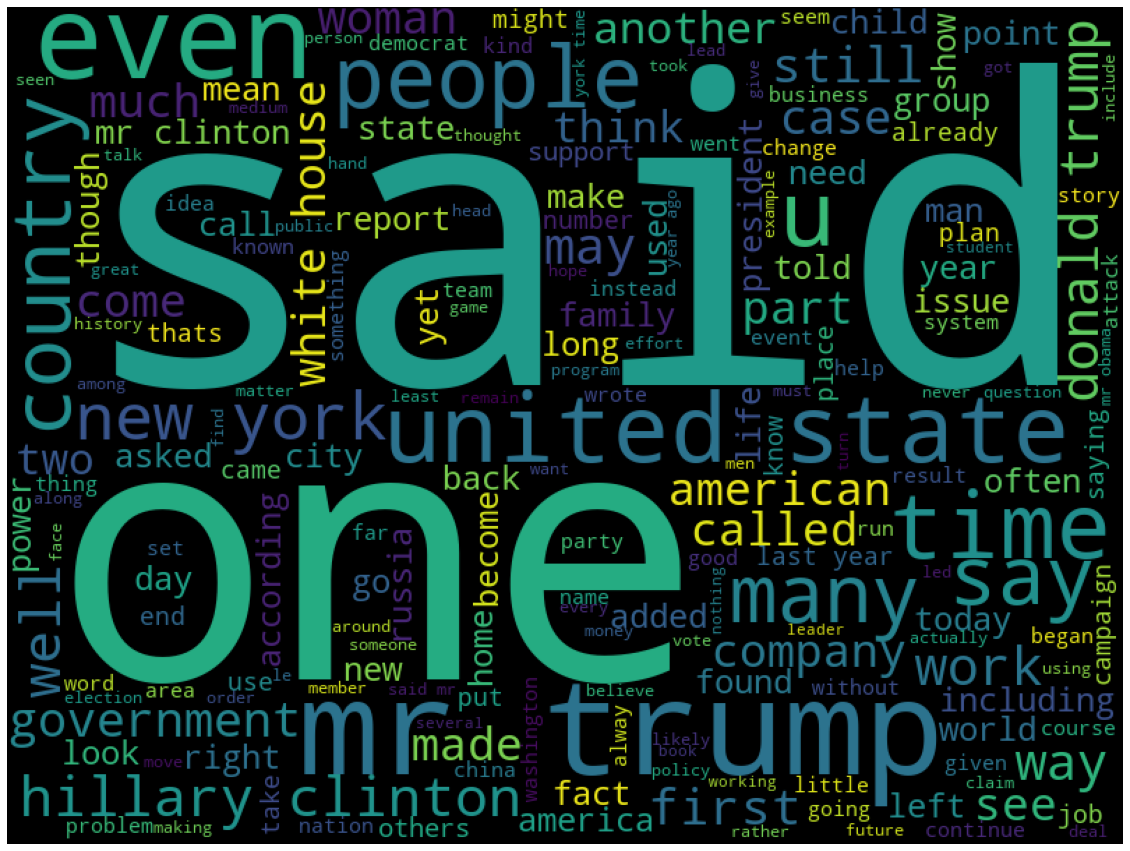

In [45]:
# Draw a wordcloud of the text feature

from wordcloud import WordCloud, STOPWORDS

# initialize the word cloud
wordcloud = WordCloud(background_color='black', width=800, height=600)
# generate the word cloud
text_cloud = wordcloud.generate(" ".join(df_train['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

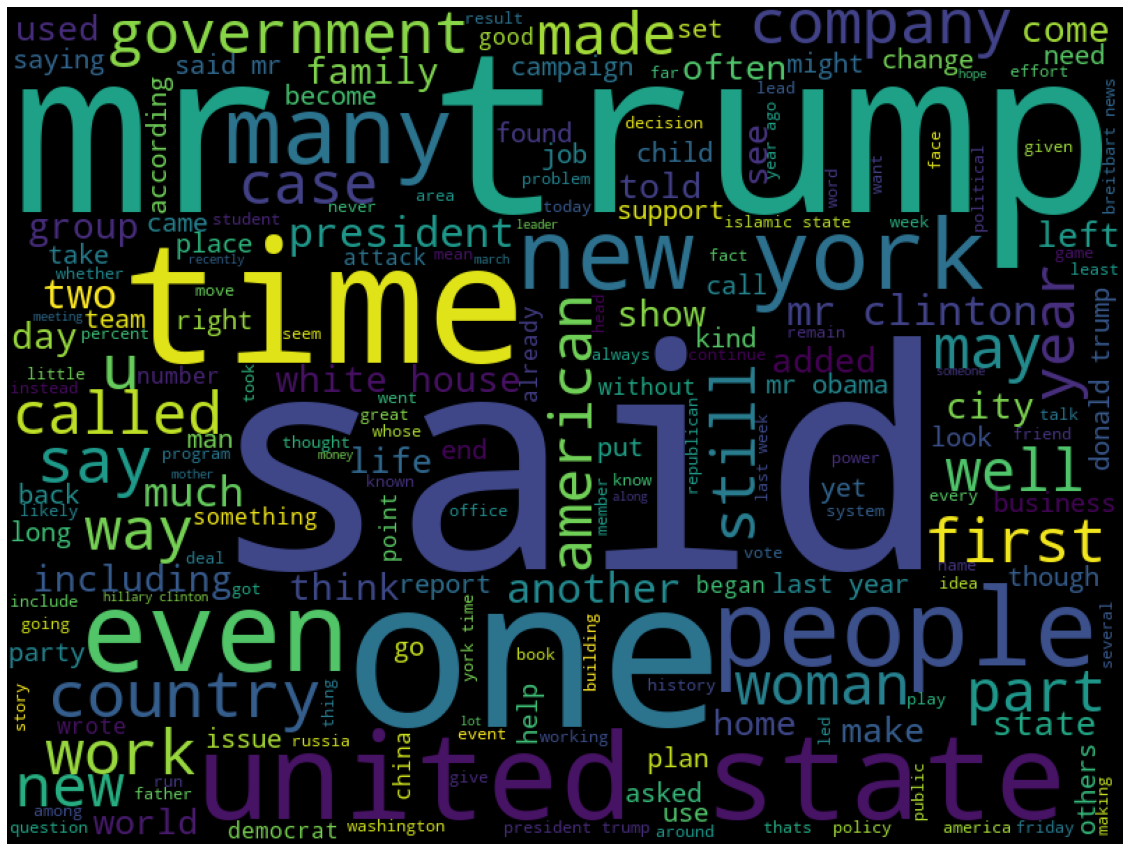

In [46]:
# Wordcloud for reliable labels
reliable_text = " ".join(df_train[df_train['label']==0]['text'])
reliable_text_cloud = wordcloud.generate(reliable_text)
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(reliable_text_cloud)
plt.axis('off')
plt.show()

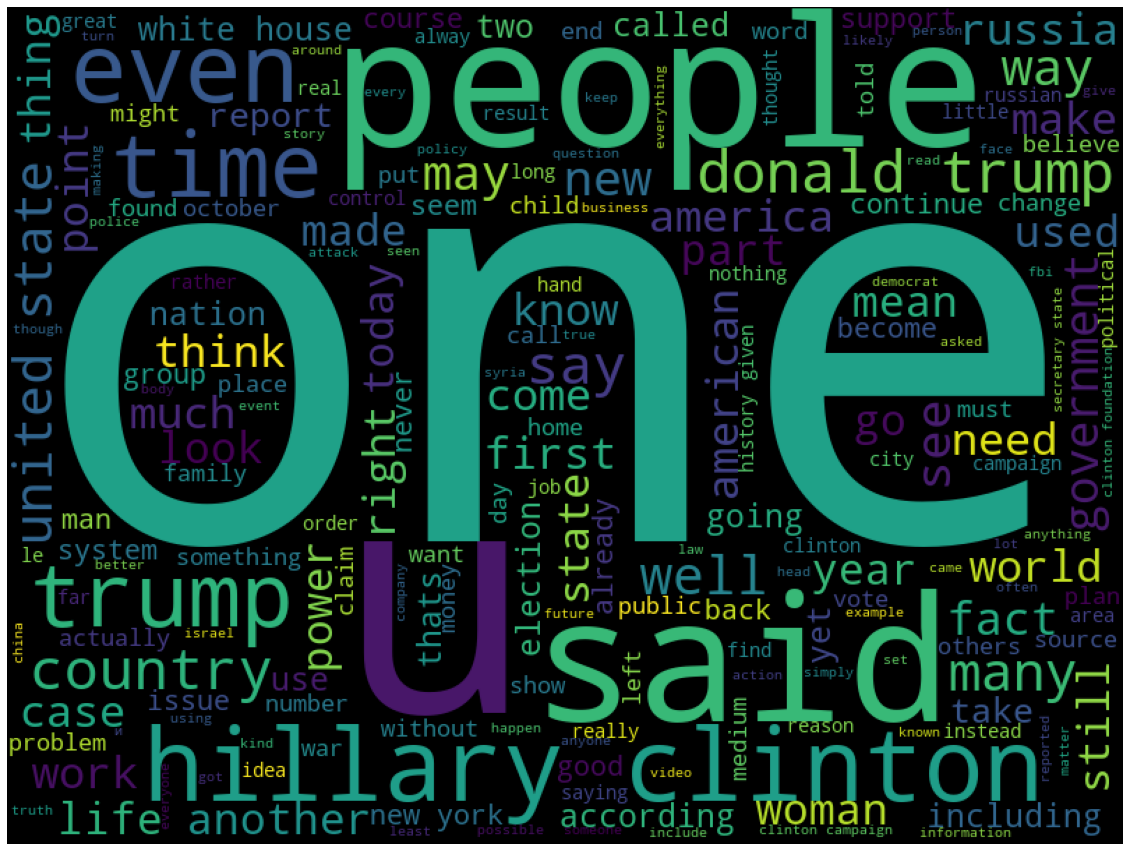

In [47]:
# Wordcloud for unreliable labels
unreliable_text = " ".join(df_train[df_train['label']==1]['text'])
unreliable_text_cloud = wordcloud.generate(unreliable_text)
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(unreliable_text_cloud)
plt.axis('off')
plt.show()

In [48]:
# Construction of bi- and trigrams (top frequent two-words and three-words in the true news)
def plot_ngrams(data, title, ylabel, xlabel="Number of Occurrence", n=2):
    true_b = (pd.Series(nltk.ngrams(data.split(), n)).value_counts())[:20]
    true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

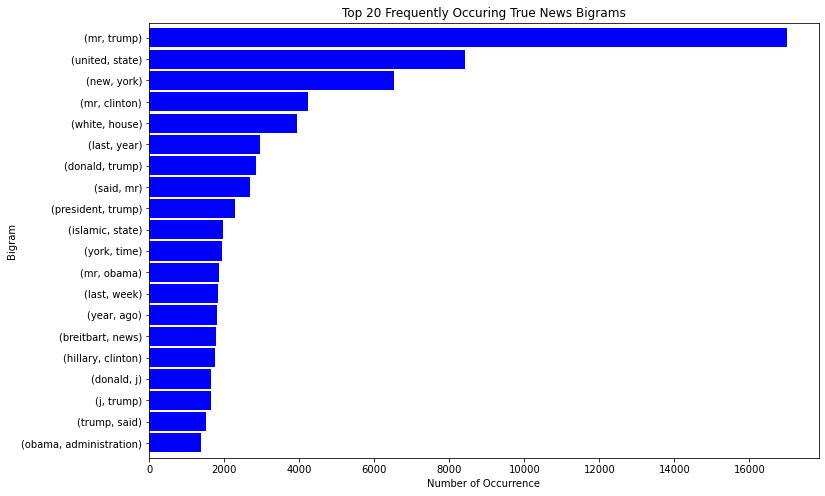

In [49]:
plot_ngrams(reliable_text, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=2)

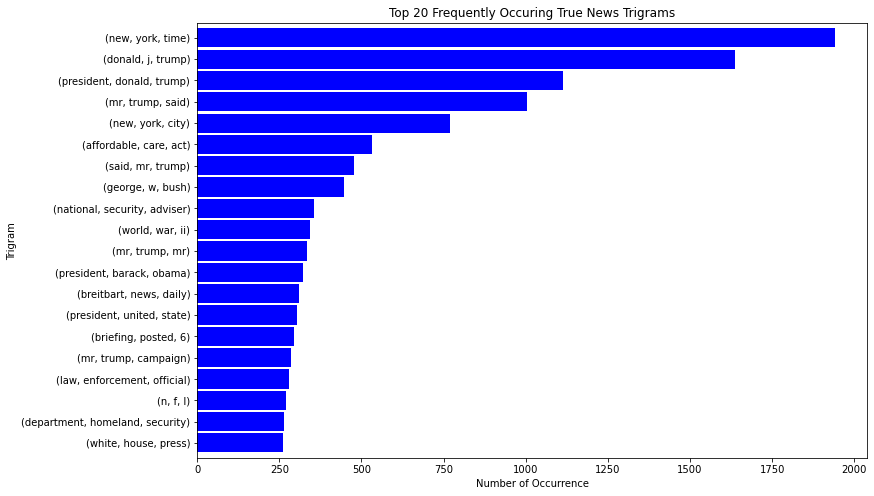

In [50]:
plot_ngrams(reliable_text, "Top 20 Frequently Occuring True News Trigrams", "Trigram", n=3)

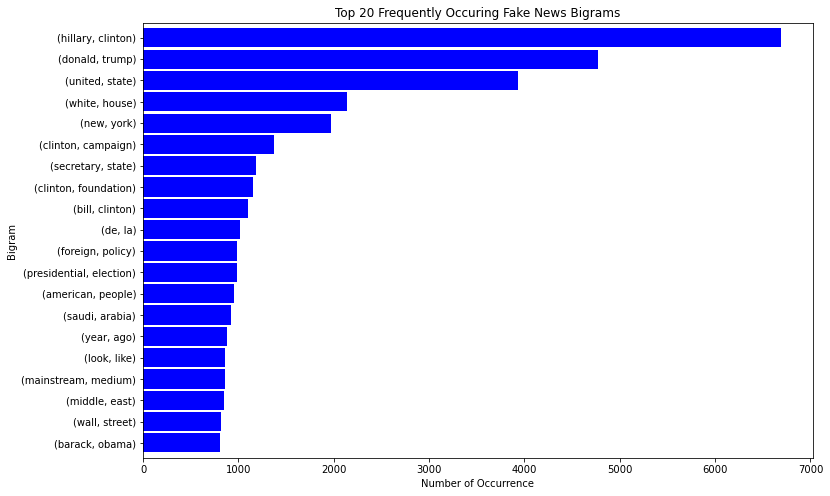

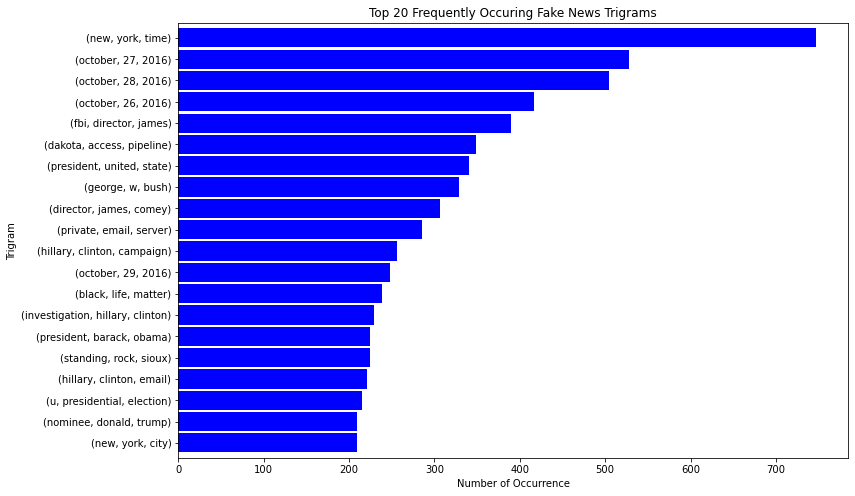

In [51]:
# Construction of bi- and trigrams (top frequent two-words and three-words in the fake news)
plot_ngrams(unreliable_text, "Top 20 Frequently Occuring Fake News Bigrams", "Bigram", n=2)
plot_ngrams(unreliable_text, "Top 20 Frequently Occuring Fake News Trigrams", "Trigram", n=3)

### Model building